In [34]:

from xenopict import shaded_svg, XenopictDrawer

%load_ext autoreload
%autoreload 2

from rdkit import Chem
import rdkit.Chem.rdPartialCharges
from IPython.display import SVG
import numpy as np


diclofenac = mol = rdkit.Chem.MolFromSmiles('O=C(O)Cc1ccccc1Nc1c(Cl)cccc1Cl')
rdkit.Chem.rdPartialCharges.ComputeGasteigerCharges(mol)
shading = np.array([a.GetDoubleProp("_GasteigerCharge")  for a in mol.GetAtoms()])
shading = shading / abs(shading).max()  # partial charge (scaled to [-1, 1])



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/swamidass/plotdot/xenopict/colormap.py:139: UserWarning: Trying to register the cmap 'xenosite_bwr' which already exists.
  cm.register_cmap(name, cmap)
/Users/swamidass/plotdot/xenopict/colormap.py:139: UserWarning: Trying to register the cmap 'xenosite' which already exists.
  cm.register_cmap(name, cmap)
/Users/swamidass/plotdot/xenopict/colormap.py:139: UserWarning: Trying to register the cmap 'xenosite_gwp' which already exists.
  cm.register_cmap(name, cmap)
/Users/swamidass/plotdot/xenopict/colormap.py:139: UserWarning: Trying to register the cmap 'xenosite_pwo' which already exists.
  cm.register_cmap(name, cmap)


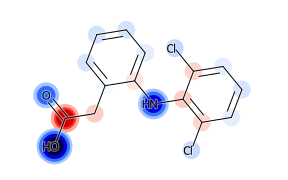

In [35]:
# Atom shading 
drawer = XenopictDrawer(mol)
drawer.shade(shading)
drawer.halo()


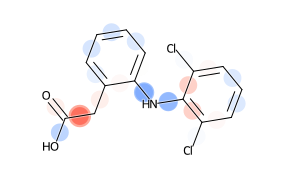

In [36]:
a1 = [b.GetBeginAtomIdx() for b in mol.GetBonds()]
a2 = [b.GetEndAtomIdx() for b in mol.GetBonds()]
bshading = (shading[a1] + shading[a2])  / 2

# Bond shading
drawer = XenopictDrawer(mol)
drawer.shade(bond_shading=(a1, a2, bshading)).halo()

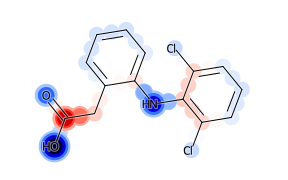

In [37]:
# Atom and bond shading togetehr
drawer = XenopictDrawer(mol)
drawer.shade(shading, bond_shading=(a1, a2, bshading))
drawer.halo()

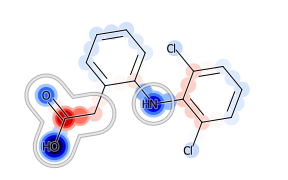

In [38]:
# Mark substructures (defined as a list of atom IDs)
drawer.mark_substructure([0,1,2,3, 10])

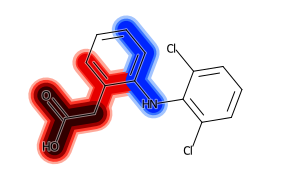

In [39]:
# Shade substructures
drawer = XenopictDrawer(mol)
drawer.shade_substructure([[0,1,2,3], [7,8,9,10], [3,4,5,9]], [1, -0.65, 0.6])
drawer.halo()


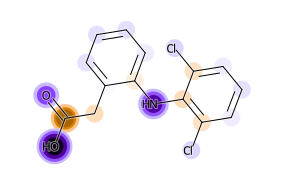

In [40]:
# Another one of the xenosite colormaps
XenopictDrawer(mol, cmap="xenosite_pwo").shade(shading).halo()

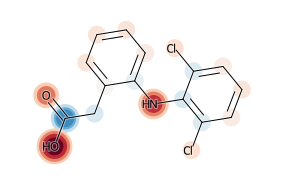

In [41]:
# any matplotlib colormap works, but most won't look as good as the default
XenopictDrawer(mol, cmap="RdBu").shade(shading).halo()

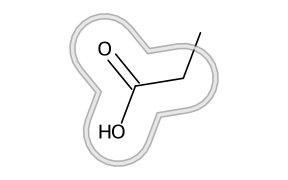

In [42]:
# depeict a substructure
drawer = XenopictDrawer(mol)
drawer.substructure_focus([0,1,2,3])


In [43]:
#get the SVG
svg = str(drawer)
print(svg)

<?xml version="1.0" ?><svg xmlns="http://www.w3.org/2000/svg" xmlns:rdkit="http://www.rdkit.org/xml" xmlns:xlink="http://www.w3.org/1999/xlink" version="1.1" baseProfile="full" xml:space="preserve" width="288px" height="180px" viewBox="17.6 63.0 108.6 111.3"><g class="shading"/><g class="mol_halo"/><g class="lines" style="fill-rule:evenodd;stroke:#000000;stroke-width:1;stroke-opacity:1;stroke-linecap:round;stroke-linejoin:round"><path class="bond-0 atom-0 atom-1" d="M 54.4,96.5 L 68.9,114.3"/><path class="bond-0 atom-0 atom-1" d="M 49.7,100.3 L 64.3,118.1"/><path class="bond-1 atom-1 atom-2" d="M 66.6,116.2 L 58.0,139.0"/><path class="bond-2 atom-1 atom-3" d="M 66.6,116.2 L 96.2,111.4"/><path class="bond-3 atom-3 atom-4" d="M 96.2,111.4 L 106.8,83.3"/></g><g class="text"><path class="atom-0" d="M 43.7 93.0 Q 43.7 91.0, 44.7 89.8 Q 45.7 88.7, 47.6 88.7 Q 49.5 88.7, 50.5 89.8 Q 51.5 91.0, 51.5 93.0 Q 51.5 95.1, 50.5 96.3 Q 49.5 97.4, 47.6 97.4 Q 45.8 97.4, 44.7 96.3 Q 43.7 95.1, 43.7 93.